# Predicting churn rate at Waze app using Random Forest and  XGboost Models

## PACE: Plan Stage 

**Introduction :** 
Waze is a community driven navigation map. It uses real time data from the app users to provide the best route to user destination taking in to account accidents, traffic jam, speed traps, construction and other obsticles. 

**Objective :**
The purpose of this project is to demostrate Exploratory Data Analysis on the data set for Waze in order to understand the churn rate amongst the users, to extract actionable ingsights and to develop a machine learning model that would predict the churn rate. We will use the PACE framework for EDA and developing machine learning model

### Step1: Imports 

#### Import packages 
In order to perform EDA and develop a machine learning algorithms, we will first start by importing the necessary packages to load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Importing packages for data modelling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,\
confusion_matrix, ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#function to plot feature importance
from xgboost import plot_importance
import pickle

In [2]:
df=pd.read_csv('waze_dataset.csv')
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


### Step 2 : Data exploration 

- Understanding the variables
- Cleaning the data 

#### Gathering basic information about the data

We will use `shape`, `size` and `info()` function to get the basic information about the data.

In [3]:
df.size

194987

In [4]:
df.shape

(14999, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
#Checking column names
df.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [7]:
df.dtypes.sort_values(ascending=False)

label                       object
device                      object
total_sessions             float64
driven_km_drives           float64
duration_minutes_drives    float64
ID                           int64
sessions                     int64
drives                       int64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
activity_days                int64
driving_days                 int64
dtype: object

#### Descriptive  statistics of the data 

In [8]:
#Checking the descriptive statistics in the data
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


#### Checking for missing values 

In [9]:
#checkign for missing values 
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

There are 700 missing values in the labels column. Since missing values cannot be investagited from the source data we will drop them and proceed

In [10]:
#Dropping the missing values
df.dropna(inplace=True)

In [11]:
#checking the missing value have been dropped 
df.isna().sum()

ID                         0
label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

## PACE: Analyze Stage 

### Data Visualization for EDA

#### Checking for outliers in the data 

We will check for outliers in the data and try to understand the distribution of variables in the dataset. For this purpose we will use a boxplot visualization to spot the outliers and a histogram to understand the distribution of the data in the datafame

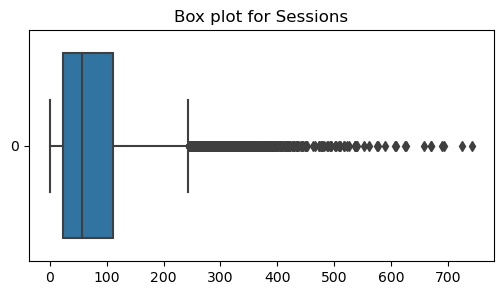

In [12]:
plt.figure(figsize=(6,3))
sns.boxplot(df['sessions'], orient='h')
plt.title('Box plot for Sessions')
plt.show();

Text(0.5, 1.0, 'Boxplot Session')

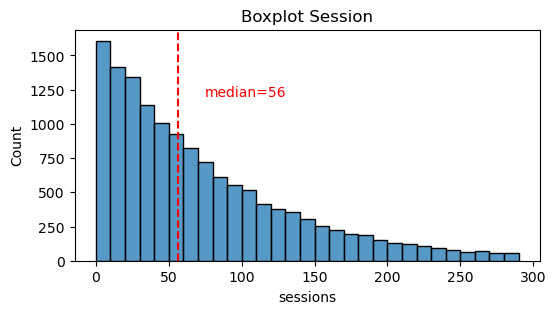

In [13]:
plt.figure(figsize=(6,3))
median= df['sessions'].median()
sns.histplot(df['sessions'], bins= range(0,(300),10))
plt.axvline(median, color='red', linestyle='--')
plt.text(75, 1200, 'median=56', color='red')
plt.title('Boxplot Session')

The distribution of sessions variable is right skewed with half of the observations having 56 or fewer sessions.

In [14]:
df['sessions'].mean()

80.62381984754178

In [15]:
df['sessions'].median()

56.0

Text(0.5, 1.0, 'BoxPlot for Drives')

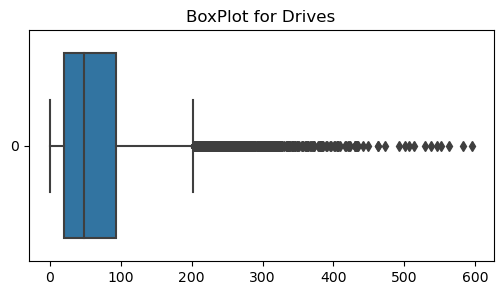

In [16]:
#Boxlot for drives
plt.figure(figsize=(6,3))
sns.boxplot(df['drives'], orient='h')
plt.title('BoxPlot for Drives')

Text(0.5, 1.0, 'Histogram for Drives')

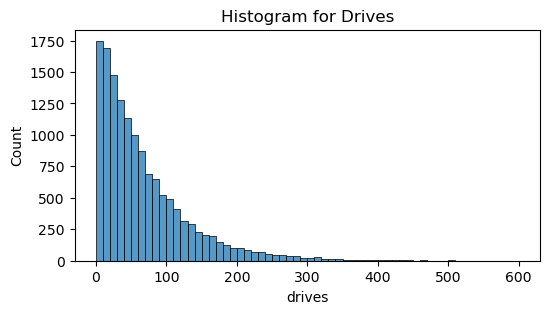

In [17]:
plt.figure(figsize=(6,3))
sns.histplot(df['drives'], bins= range(0,(600+1),10))
plt.title('Histogram for Drives')

In [18]:


df['drives'].median()

48.0

In [19]:
df['drives'].mean()

67.25582208546052

As we can see that the distribution is right skewed for `drives` just like that of `sessions` where half of the observations have less than 48 drives.

Text(0.5, 1.0, 'Boxplot for Total Sessions')

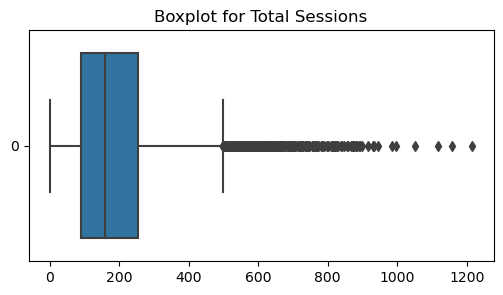

In [20]:
plt.figure(figsize=(6,3))
sns.boxplot(df['total_sessions'], orient='h')
plt.title('Boxplot for Total Sessions')

Text(0.5, 1.0, 'Histogram for Total Sessions')

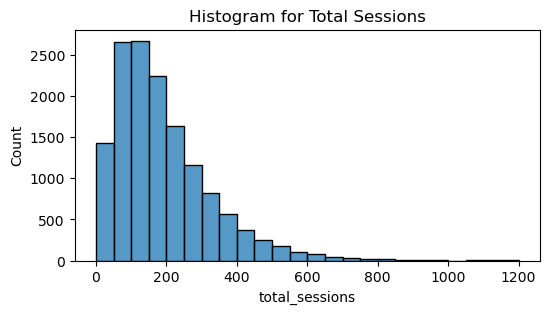

In [21]:
plt.figure(figsize=(6,3))
sns.histplot(df['total_sessions'], bins=range(0,(1201),50))
plt.title('Histogram for Total Sessions')

In [22]:
df['total_sessions'].median()

158.7185714

In [23]:
df['total_sessions'].mean()

189.54740851694336

As shown in the histogram, the distrution for `total_session` is right skewed. The median for `total_session` is 159.56 whereas the median for `session` was 56. We can watch this variable closely.

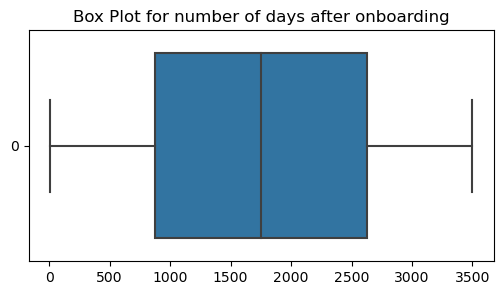

In [24]:
plt.figure(figsize=(6,3))
sns.boxplot(df['n_days_after_onboarding'],orient='h' )
plt.title('Box Plot for number of days after onboarding')
plt.show()

Text(0.5, 1.0, 'Hostogram for number of days after onboarding')

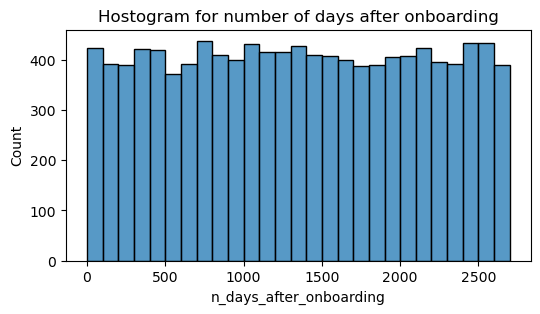

In [25]:
plt.figure(figsize=(6,3))
sns.histplot(df['n_days_after_onboarding'], bins= range(0,(2800),100))
plt.title('Histogram for number of days after onboarding')

The distrbution is even for most of the observations in `n_days_after_onbording`. 

Text(0.5, 1.0, 'Box plot for total navigations')

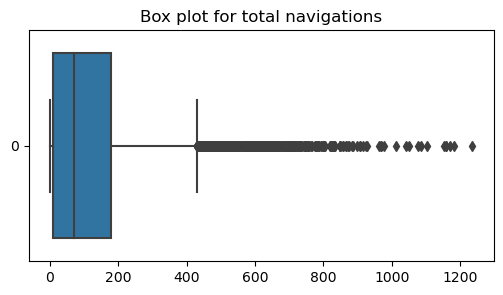

In [26]:
plt.figure(figsize=(6,3))
sns.boxplot(df['total_navigations_fav1'], orient='h')
plt.title('Box plot for total navigations')

Text(0.5, 1.0, 'Histogram for total navigations')

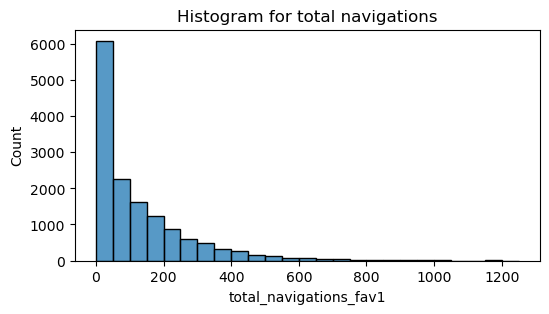

In [27]:
plt.figure(figsize=(6,3))
sns.histplot(df['total_navigations_fav1'], bins=range(0,(1300),50))
plt.title('Histogram for total navigations')

The distribution for `total_navigations` is right skewed. We can find the skewness of the variable from the skew() function. A psoitive skew values indicates a right skewed data in which the mean is greater than the median

In [28]:
#Finding the skewness of the data in the column
df['total_navigations_fav1'].skew()

1.9664988174737175

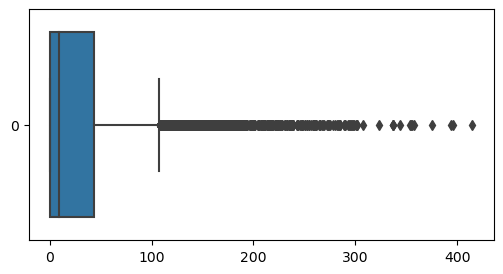

In [29]:
plt.figure(figsize=(6,3))
sns.boxplot(df['total_navigations_fav2'], orient='h')
plt.show();

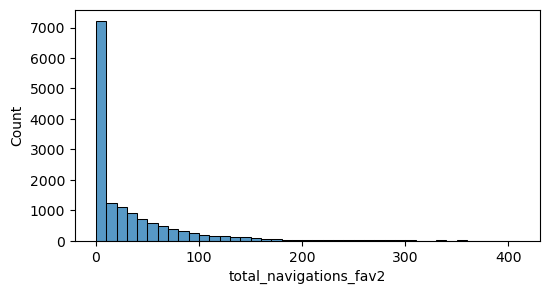

In [30]:
plt.figure(figsize=(6,3))
sns.histplot(df['total_navigations_fav2'], bins= range(0,(420),10))
plt.show();

The distribution for `total_navigation_fav2` variable is also positively skewed

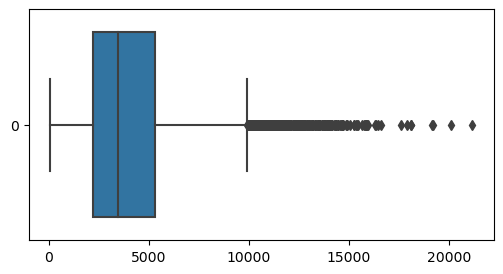

In [31]:
plt.figure(figsize=(6,3))
sns.boxplot(df['driven_km_drives'], orient='h')
plt.show()

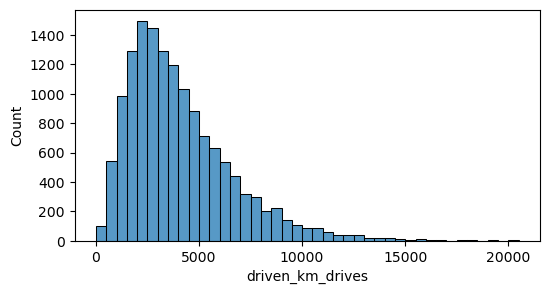

In [32]:
plt.figure(figsize=(6,3))
sns.histplot(df['driven_km_drives'], bins= range(0,(21000),500))
plt.show();

The distribution for `driven_km_drives` is slightly positively skewed. 

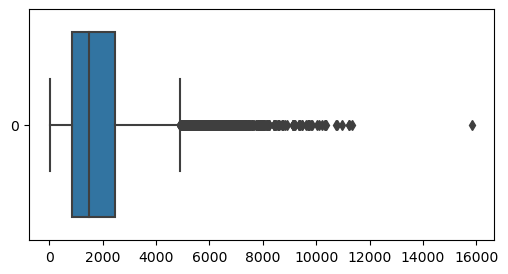

In [33]:
plt.figure(figsize=(6,3))
sns.boxplot(df['duration_minutes_drives'], orient='h')
plt.show();

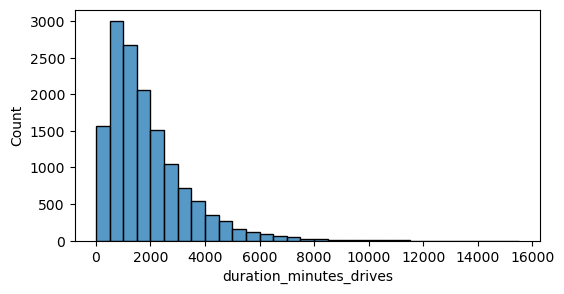

In [34]:
plt.figure(figsize=(6,3))
sns.histplot(df['duration_minutes_drives'], bins= range(0,(16000),500))
plt.show();

 The distribution for `duration_minutes_drive` is also right skewed. 

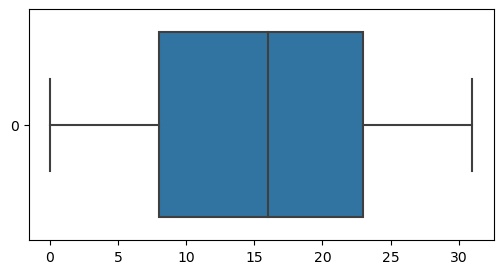

In [35]:
plt.figure(figsize=(6,3))
sns.boxplot(df['activity_days'], orient='h')
plt.show();

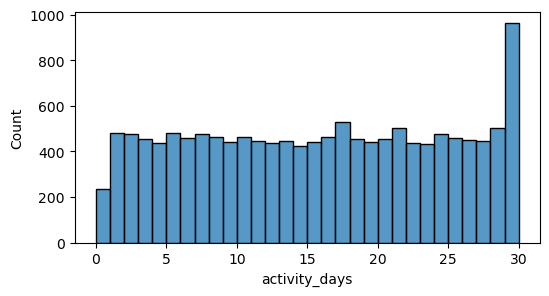

In [36]:
plt.figure(figsize=(6,3))
sns.histplot(df['activity_days'], bins=range(0,(31),1))
plt.show();

The distribution for `activity_days` is fairly even except for the last day of the month where is jumps to around 1000 counts.

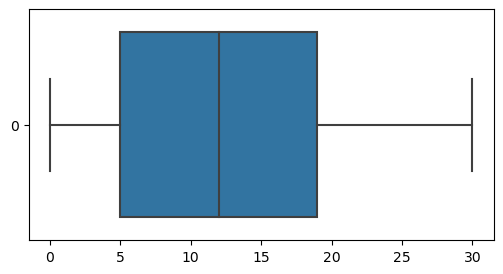

In [37]:
plt.figure(figsize=(6,3))
sns.boxplot(df['driving_days'], orient='h')
plt.show();

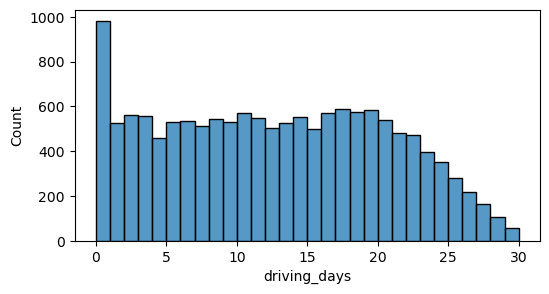

In [38]:
plt.figure(figsize=(6,3))
sns.histplot(df['driving_days'], bins= range(0,(31),1))
plt.show();

The first day of the month has the highest observations for the distribution for `driving_days` variable

We will construct **Pie Chart** to understand the Categorical Variables `device` and `label`.

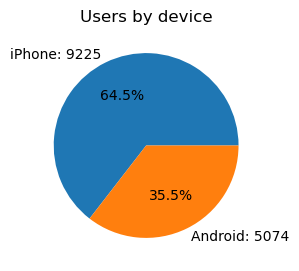

In [39]:
#Pie chart 
plt.figure(figsize=(6,3))
data=df['device'].value_counts()
plt.pie(data,labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

Most Waze app users use iPhone (64.5%) while the rest are android users. 

In [40]:
df['label'].value_counts()

retained    11763
churned      2536
Name: label, dtype: int64

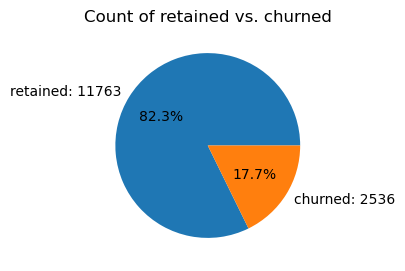

In [41]:
#For 
fig = plt.figure(figsize=(6,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Waze App has a churn rate of less than 20 %. Also it can be seen that there is a class imbalance in the dataset which will help us in deciding the evaluation metrix when we willd evelop the model. 

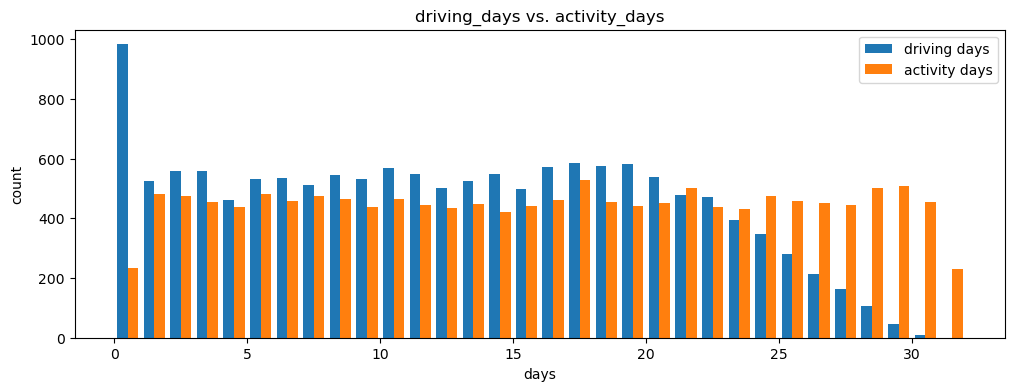

In [42]:
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

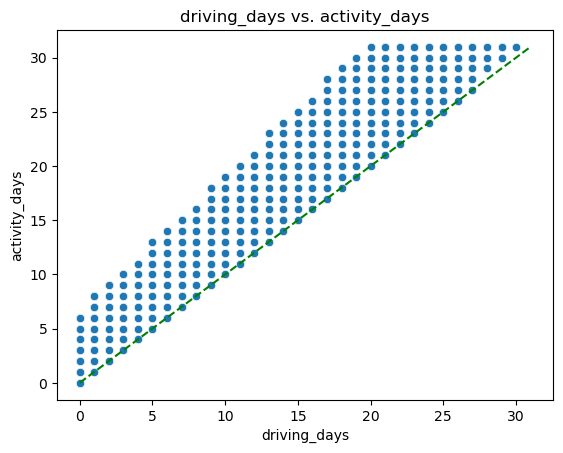

In [43]:
# we will do a scatter plot to understand the relationship between activity days and driving days 
sns.scatterplot(data=df, x='driving_days', y='activity_days')
plt.title('driving_days vs. activity_days')
plt.plot([0,31], [0,31], color='green', linestyle='--');

As shown in the trend line, there is a positve corelation between `activity_days` and `driving_days`.

### Checking for outliers in the data
Depending on the machine learnign model we choose, we need to identify the outliers in the dataset and deal with them accordingly. Here we will check the outliers in the data set as indicated in the boxplot visualization. Since we are comparing Random forest model and  XGBoost model, we will keep the outliers as these model are robust with the outliers.

In [44]:
#Checking for outliers in the data for key variables
quantile_25=df['sessions'].quantile(0.25)
quantile_75= df['sessions'].quantile(0.75)
#calculating interquantile range
iqr=quantile_75 - quantile_25
upper_limit= quantile_75 + 1.5 * iqr
lower_limit = quantile_25 - 1.5 *iqr

In [45]:
outliers_mask=(df['sessions']>upper_limit)|(df['sessions'] < lower_limit)

In [46]:
outliers= df[outliers_mask]
outliers['sessions'].count()

709

There are 729 values that are outliers in the variable `sessions`. we can assess these values thrpuh head function

In [47]:
outliers['sessions'].max()

743

In [48]:
outliers['sessions'].min()

244

In [49]:
#identifying outliers for drives 

quantile_25 = df['drives'].quantile(0.25)
quantile_75 = df['drives'].quantile(0.75)

#calculating Inter quantile range 

iqr = quantile_75 - quantile_25

#calculating upper limit for the variable
upper_limit= quantile_75 + 1.5 * iqr
#calculating lower limit 
lower_limit = quantile_25 - 1.5 * iqr

In [50]:

outliers_mask = (df['drives'] > upper_limit)| (df['drives'] < lower_limit)

In [51]:
outliers = df[outliers_mask]
outliers['drives'].count()


695

In [52]:
outliers.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
17,17,churned,272,219,564.271485,88,0,90,3529.338980,2078.426838,11,11,Android
33,33,retained,291,233,568.722765,275,39,9,2578.720200,1703.292389,15,15,iPhone
63,63,retained,253,203,298.673647,1546,0,88,4695.169432,2146.467081,6,1,iPhone
88,88,retained,306,246,320.257531,2252,60,0,3595.562658,2420.119875,28,20,Android


In [53]:
#identifying outliers for duration minutes

quantile_25 = df['duration_minutes_drives'].quantile(0.25)
quantile_75 = df['duration_minutes_drives'].quantile(0.75)

#calculating Inter quantile range 

iqr = quantile_75 - quantile_25

#calculating upper limit for the variable
upper_limit= quantile_75 + 1.5 * iqr
#calculating lower limit 
lower_limit = quantile_25 - 1.5 * iqr

In [54]:
outliers_mask = (df['duration_minutes_drives'] > upper_limit)| (df['duration_minutes_drives'] < lower_limit)

In [55]:
outliers= df[outliers_mask]
outliers['duration_minutes_drives'].count()

613

In [56]:
outliers['duration_minutes_drives'].min()

4908.860032

In [57]:
#identifying outliers for duration minutes

quantile_25 = df['driven_km_drives'].quantile(0.25)
quantile_75 = df['driven_km_drives'].quantile(0.75)

#calculating Inter quantile range 

iqr = quantile_75 - quantile_25

#calculating upper limit for the variable
upper_limit= quantile_75 + 1.5 * iqr
#calculating lower limit 
lower_limit = quantile_25 - 1.5 * iqr
#Finding outliers
outliers_mask = (df['driven_km_drives'] > upper_limit)| (df['driven_km_drives'] < lower_limit)
outliers= df[outliers_mask]
outliers['driven_km_drives'].count()

440

In [58]:
outliers.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
30,30,retained,78,66,484.571643,2381,106,21,10573.019780,6978.070441,31,26,iPhone
48,48,churned,48,42,223.252729,757,335,28,9947.593149,3369.145354,8,2,iPhone
59,59,retained,23,20,24.464776,1924,169,0,11556.277480,4966.840886,27,26,Android
62,62,retained,69,56,81.665854,1356,373,0,11014.870140,9143.800241,24,23,iPhone


## PACE: Construct Stage

Now that we have identified the outliers in the data, we can decide weither to keep the outliers or drop depending on the machine learning model we choose. In our case we will keep the outliers

We will check for class imbalance in the data set 

In [59]:
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

 We can see that there is class imbalance in the data seet where retained class outweights the churned class but it is around 80/2 so we will proceed with it.

In [60]:
#Creating a binary variable
df['label']= np.where(df['label']=='churned', 1,0)

In [61]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [62]:
df.drop('ID', axis=1, inplace=True)

In [63]:
df['device']= np.where(df['device']=='Android',0,1)

In [64]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0
1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1
2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0
3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1
4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0


In [66]:
df1= df.copy()

In [67]:
df1.dtypes.sort_values(ascending=False)

total_sessions             float64
driven_km_drives           float64
duration_minutes_drives    float64
label                        int64
sessions                     int64
drives                       int64
n_days_after_onboarding      int64
total_navigations_fav1       int64
total_navigations_fav2       int64
activity_days                int64
driving_days                 int64
device                       int64
dtype: object

### Feature engineering 

### Creating `km_per_driving_day` variable 

In [68]:
df1['km_per_driving_day']= df1['driven_km_drives']/ df1['driving_days']

In [69]:
#Get the descriptive stats'
df1['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.241789e+02
75%      7.608293e+02
max               inf
Name: km_per_driving_day, dtype: float64

Some of the values are infinitive because of zero in the denominator. We will get rid of infinite values in the dataset and convert it in to zeros

In [70]:
df1.loc[df1['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0
df1['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

We can now see that the infinity values have been replaced with zeros.

### Creating `percent_session_in_last_month` variable 

In [71]:
df1['percent_session_in_last_month'] = df1['sessions'] / df1['total_sessions']
#Get the decriptive stats
df1['percent_session_in_last_month'].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_session_in_last_month, dtype: float64

### Creating `professional_driver` variable 

In [72]:
#Create a professional driver variable wih conditions using np.where function 

df1['professional_driver']= np.where((df1['driving_days']>= 15) & (df1['drives']>=60),1,0)

In [73]:
df1['professional_driver'].value_counts()

0    11811
1     2488
Name: professional_driver, dtype: int64

In [74]:
# Create `total_sessions_per_day` feature
df1['total_sessions_per_day'] = df1['total_sessions'] / df1['n_days_after_onboarding']

### Creating `total_session_per_day` variable 

In [75]:
df1['total_sessions_per_day'].describe()

count    14299.000000
mean         0.338207
std          1.319814
min          0.000298
25%          0.050818
50%          0.100457
75%          0.215210
max         39.763874
Name: total_sessions_per_day, dtype: float64

### Creating **`km_hour`** variable 

In [76]:
#create Km per hour feature
df1['km_hour'] = df1['driven_km_drives']/(df1['duration_minutes_drives']/60)

In [77]:
df1['km_hour'].describe()

count    14299.000000
mean       190.730963
std        339.926138
min         72.013095
25%         90.649402
50%        122.105845
75%        193.238449
max      23642.920871
Name: km_hour, dtype: float64

### Creating `km_per_drive` variable 

In [78]:
df1['km_per_drive']= df1['driven_km_drives']/df1['drives']

In [79]:
df1['km_per_drive'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.325389e+01
50%      7.490594e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [80]:
#Converting the infinite values to zero
df1.loc[df1['km_per_drive']==np.inf, 'km_per_drive']=0


In [81]:
df1['km_per_drive'].describe()

count    14299.000000
mean       232.269197
std        616.197409
min          0.000000
25%         32.486524
50%         72.947059
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

As we can see that the infinity values have been replaced with zeros.

In [82]:
df1.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,percent_session_in_last_month,professional_driver,total_sessions_per_day,km_hour,km_per_drive
0,0,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,0,138.360267,0.953670,1,0.130381,79.430298,11.632058
1,0,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,1,1246.901868,0.406856,0,0.266854,260.389902,128.186173
2,0,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,0,382.393602,0.841186,0,0.051121,113.953460,32.201567
3,0,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,1,304.530374,0.724968,0,4.505948,93.351141,22.839778
4,0,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,0,219.455667,0.499266,1,0.107713,194.342970,58.091206


We will isolate the response variable and predictor variables to further split the data

In [83]:
y= df1['label']
X= df1.copy()
X= X.drop('label', axis=1)

In [84]:
#Split the data in to training and test 
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [85]:
#Split the data in to train and validate sets 
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, stratify=y_train, test_size=0.25, random_state=42 )

In [86]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8043
2681
3575


We will begin by using `GridSearchCV` to tune a random forest model.
Initiate random forest classifier `rf` and set the random state 

Create a dictionary `cv_params` of the following hyperparameters and their corrosponding values to tune 
- `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

In [87]:
#Instantiate a random forest classifier
rf= RandomForestClassifier(random_state=42)
#Create a dictionay of hyper parameters
cv_params={'max_depth':[None],
          'max_features':[1.0],
          'max_samples':[1.0],
          'min_samples_leaf':[2],
          'min_samples_split':[2],
          'n_estimators':[300],}
#define a dictionary for scoring metrics
scoring={'accuracy','precision','recall','f1'}
#Instantiate  GridSearch Cv
rf_cv=GridSearchCV(rf, cv_params, scoring=scoring, cv=4,refit='recall')

In [88]:
%%time 
rf_cv.fit(X_train, y_train)

CPU times: user 1min 25s, sys: 157 ms, total: 1min 25s
Wall time: 1min 25s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [89]:
rf_cv.best_score_

0.13805550310011644

In [90]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Extracting all the evaluation scores from GridSearch best model

In [91]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [92]:
results=make_results('Rf_cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,Rf_cv,0.474219,0.138056,0.213815,0.819844


We will now try to improve the scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a set `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

**XGboost** model

In [94]:
#Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [95]:
%%time
xgb_cv.fit(X_train,y_train)

CPU times: user 3min 9s, sys: 4.1 s, total: 3min 13s
Wall time: 24.5 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring={'accuracy', 'recall', 'f1', 'precision'})

In [96]:
xgb_cv.best_score_

0.18570602398262676

In [97]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

We will now extract the scores by using the function make_results() earlier on the XGboost Model from the traning dataset and join it with the results of the random forest model to compare the scores from both models.

In [98]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Rf_cv,0.474219,0.138056,0.213815,0.819844
0,XGB cv,0.422735,0.185706,0.258021,0.810519


### Model Selection

we will check the prediction of both Random forest and XGBoost on the validation data ansd see which model performs better. The better of the two models will be chooses as the champion model

In [99]:
#Model Selection 
rf_val_preds=rf_cv.best_estimator_.predict(X_val)


In [100]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [102]:
#Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Rf_cv,0.474219,0.138056,0.213815,0.819844
0,XGB cv,0.422735,0.185706,0.258021,0.810519
0,RF val,0.413043,0.120000,0.185971,0.813875


In [103]:
#Use XGBoost model to predict on validation data
xgb_val_pred=xgb_cv.best_estimator_.predict(X_val)
#Get validation score for XGboost
xgb_val_scores=get_test_scores('XGBval', xgb_val_pred, y_val)
#Append to the result table 
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Rf_cv,0.474219,0.138056,0.213815,0.819844
0,XGB cv,0.422735,0.185706,0.258021,0.810519
0,RF val,0.413043,0.120000,0.185971,0.813875
0,XGBval,0.403061,0.166316,0.235469,0.808653


The XGBoost validation score was also low but it was a better model than Random Forest so we will choose it.

## PACE: execute 

We will now use the better model which is XGBoost model to predict on the test dataset.

In [105]:
#Use XG boost model to predict on test data
xgb_test_pred=xgb_cv.best_estimator_.predict(X_test)
#Get test scores for XGBoost model
xgb_test_scores=get_test_scores('Xgb_test', xgb_test_pred, y_test)
#Append the results
results=pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Rf_cv,0.474219,0.138056,0.213815,0.819844
0,XGB cv,0.422735,0.185706,0.258021,0.810519
0,RF val,0.413043,0.120000,0.185971,0.813875
0,XGBval,0.403061,0.166316,0.235469,0.808653
0,Xgb_test,0.398577,0.176656,0.244809,0.806713


The recall improved to 17.6 percent from 16.6% on validaton data, whereas precision remained almost same. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### Confusion Matrix

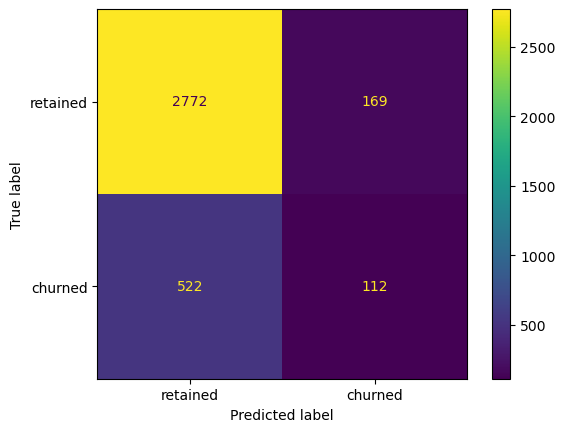

In [106]:
#generating array of values
cm=confusion_matrix(y_test, xgb_test_pred, labels=xgb_cv.classes_)
#Consufion matrix display
display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'churned'])
display.plot()

The model predcited four time as many false negatives as flase positives and correctly identified only 18 percent who churned. Overall XGBoost model performed better than random forest model but the model was able to give an F1 score of only 24.4 percent  

### Feature Importance

we will use `plot_importance` function to inspect the most important features of the model

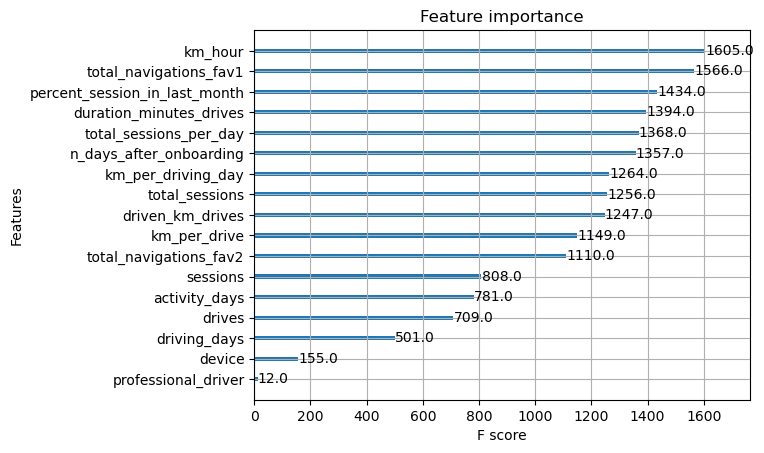

In [107]:
plot_importance(xgb_cv.best_estimator_);

6 of the most important features are derived from features engineering which tells us why feature engineering is so important. The data seems not to be predictive of the choosen target. 

### Conclusion

The model cannot predict the churn rate but it can guide the management to guide them to futher exploratory efforts